<a href="https://colab.research.google.com/github/vikiysr/mlprojects/blob/main/Loan%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Problem Statement
i. This is a Property Loan Status Prediction dataset, we have the data of
applicants who had previously applied for the loan based on the property and
applicant-based metrics.
ii. The bank will decide whether to give a loan to the applicant based on some

factors such as Applicant Income, Loan Amount, previous Credit History, Co-
applicant Income, etc.

iii. The objective is to build a Machine Learning Model to predict the loan to be
approved or to be rejected for an applicant.
iv. You are free to use any classification model such Logistic Regression, Decision
Tree, RF or XGBoost.

##Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings                        
warnings.filterwarnings("ignore")


#2.Data Acquisition

Loading the Dataset

In [2]:
train=pd.read_csv("/content/Loan_Status_train.csv")
test=pd.read_csv("/content/Loan_Status_test.csv")

Features and Dimensions of the dataset

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
#test data is similar to train data except loan_status column

In [6]:
train.shape,test.shape

((614, 13), (367, 12))

#3.Explaratory Data Analysis

In [7]:
#first explore target feature
train.Loan_Status.value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [8]:
#we have loan approval of 68% and rejection of 31%

In [9]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
#we have 5 categorical, 3 ordinal and 4 numerical features

Plotting the categorical features

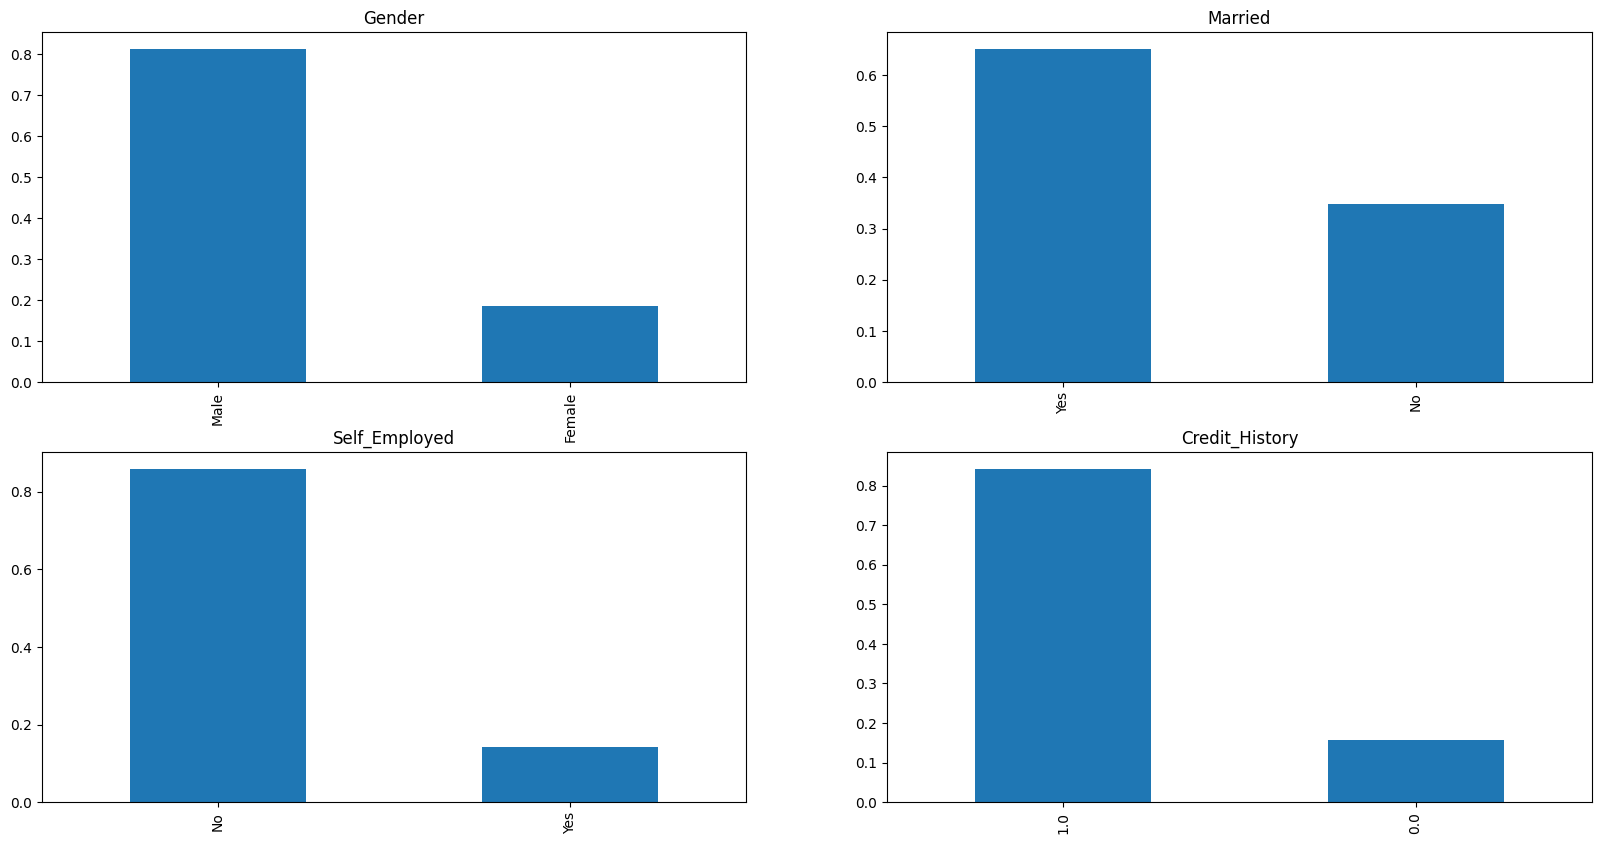

In [12]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

In [13]:
#from the plots we infere that 
#80% are male,
#70% are married,
#15% are self employed,
#85% have previous credit history

Plotting the ordinal feature variables

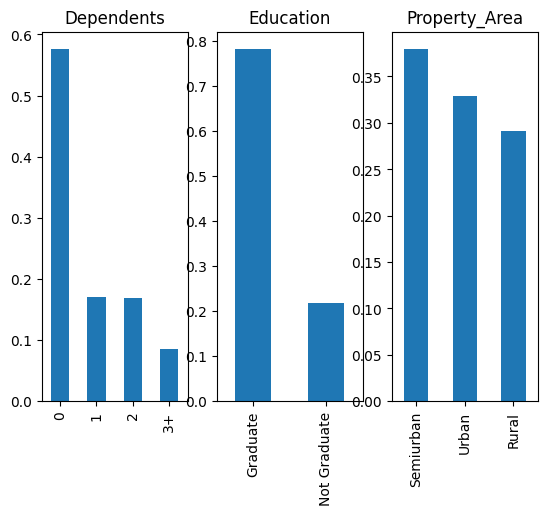

In [14]:
plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

In [15]:
#from the plots we infere that 
#50% don't have dependents
#75% are graduates
#40% are from semiurban areas

Plotting Numerical Values

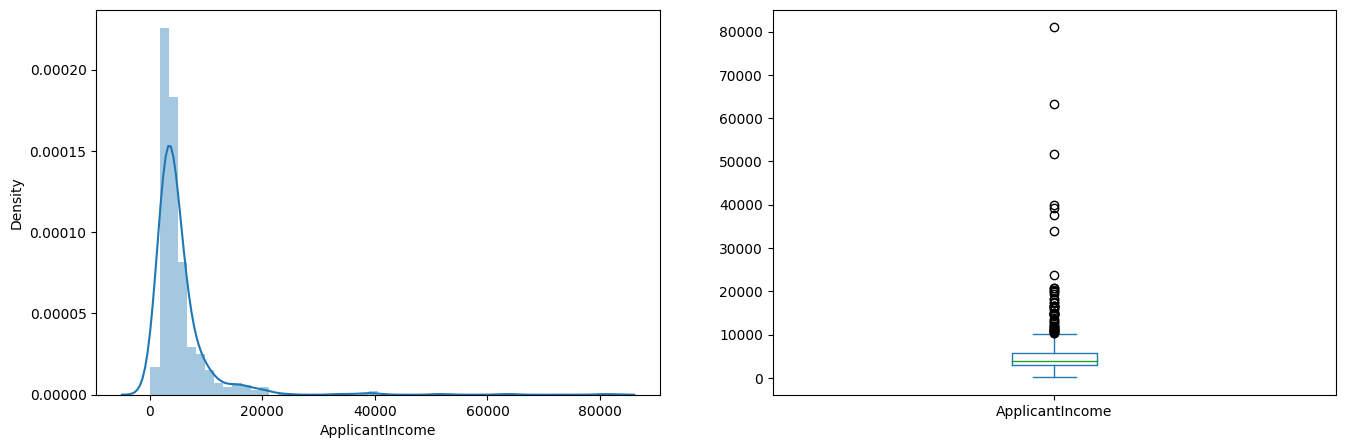

In [16]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

In [17]:
#The data is not normally distributed

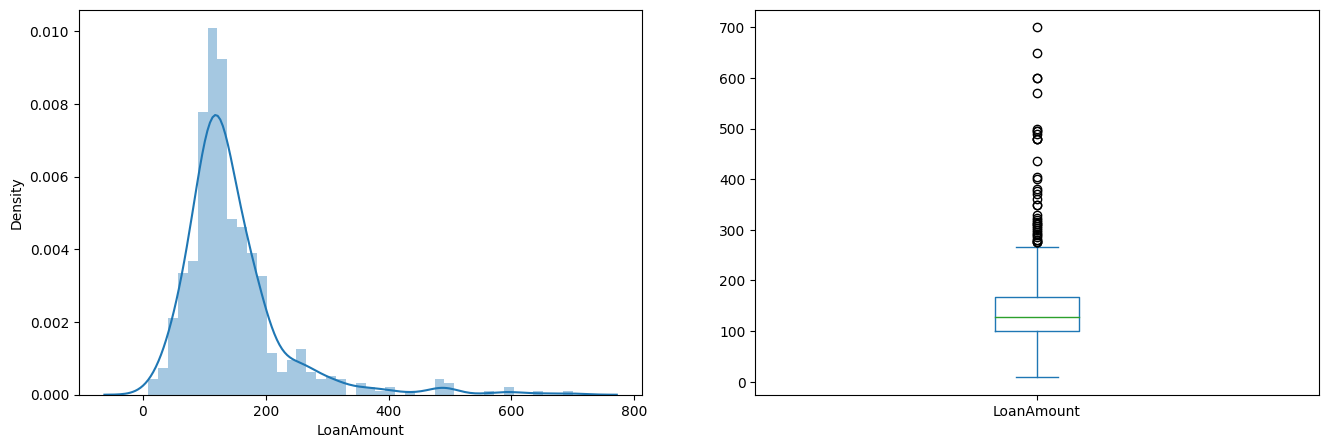

In [18]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['LoanAmount']); 
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

In [19]:
#The distribution is almost normal but contains a lot of outliers

Independent variables vs Target variables

<Axes: xlabel='Gender'>

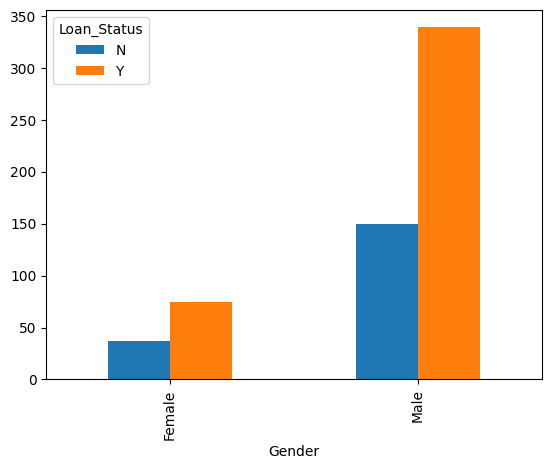

In [20]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.plot(kind='bar')

<Axes: xlabel='Married'>

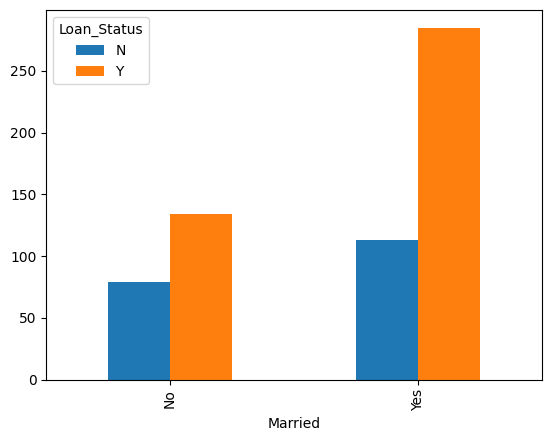

In [21]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Married.plot(kind='bar')

<Axes: xlabel='Dependents'>

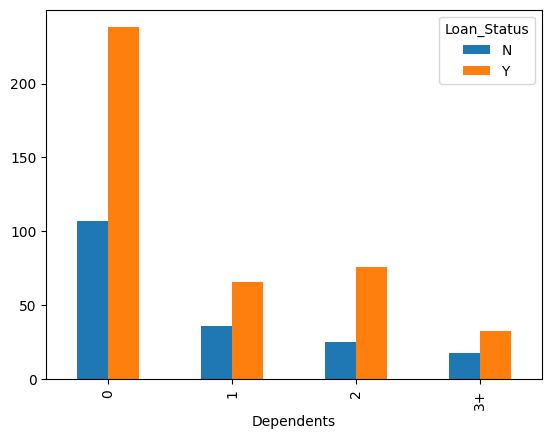

In [22]:
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.plot(kind="bar")

<Axes: xlabel='Education'>

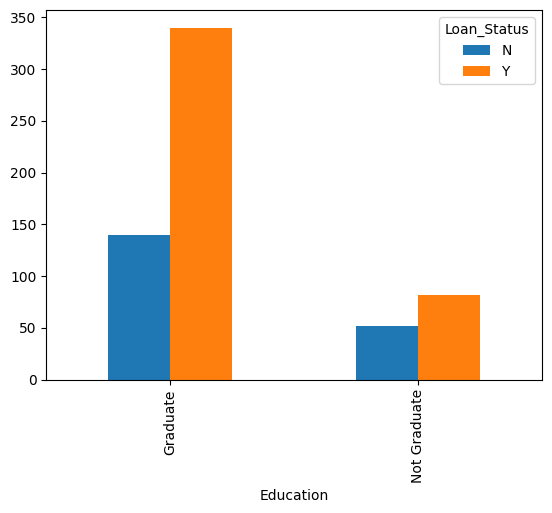

In [23]:
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Education.plot(kind="bar")
 

<Axes: xlabel='Self_Employed'>

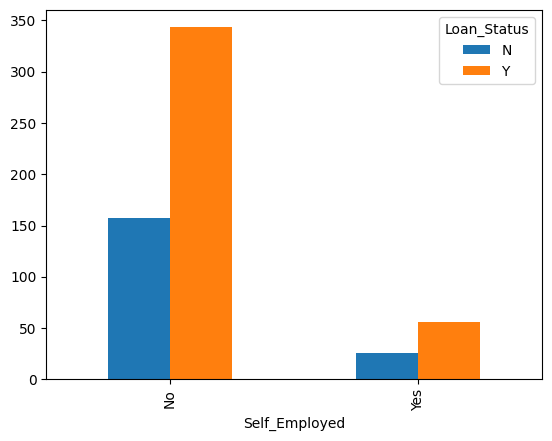

In [24]:
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.plot(kind="bar")

#4.Data Preprocessing



Label Encoding

In [25]:
train.replace({"Gender":{"Male":1,"Female":0},"Married":{"Yes":1,"No":0},"Education":{"Graduate":1,"Not Graduate":0
                            },"Self_Employed":{"Yes":1,"No":0},"Property_Area":{"Urban":0,"Rural":1,"Semiurban":2},
                              "Loan_Status":{"Y":1,"N":0}},inplace=True)
train.replace({"Dependents":{"0":0,"1":1,"2":2,"3+":4}},inplace=True)

Checking the null values in features

In [26]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Description about the dataset

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 62.5+ KB


Imputing the Null values of continous data with median value

In [28]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [29]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].median(),inplace=True)

Imputing the null values in categorical features with mode 

In [30]:
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)

In [31]:
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

Checking for null values

In [32]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Since the nullvalues in the above features are small(less than 3% compared to total data), we drop it

In [33]:
train.dropna(inplace=True)

In [34]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Preview of Data set after cleaning the null values

In [35]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,0,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


Segregating the independent feature and dependent feature

In [36]:
X=train.drop(columns=["Loan_ID","Loan_Status"])
y=train.Loan_Status

#5.Model Fitting

###Model Selection based on performance

In [37]:
models=[LogisticRegression(max_iter=1000),SVC(kernel="linear"),KNeighborsClassifier(),RandomForestClassifier()]

Creating a function to compare different models

In [38]:
def compare_cross_val():
  for model in models:
    cv_score=cross_val_score(model,X,y,cv=5)
    mean_accuracy=sum(cv_score)/len(cv_score)
    mean_accuracy=mean_accuracy * 100
    mean_accuracy=round(mean_accuracy,2)
    print(model,'=',cv_score)
    print(model,mean_accuracy)
    print("-------------------------------")

In [ ]:
#compare_cross_val()

LogisticRegression(max_iter=1000) = [0.80508475 0.77777778 0.76923077 0.87179487 0.77777778]
LogisticRegression(max_iter=1000) 80.03
-------------------------------


Accuracy of logisticRegression and SVC is almost same,we are taking svc as the model and optimize the model through hyperparameter tuning

##GridSearchCV

In [39]:
model=SVC()

In [40]:
#hyper parameters

parameters={
            "kernel":["linear","rbf","poly","sigmoid"],
            "C":[1,2,10,20]

}

In [41]:
#gridsearch
classifier=GridSearchCV(model,parameters,cv=5)
X=np.asarray(X)
y=np.asarray(y)

In [ ]:
classifier.fit(X,y)

In [ ]:
classifier.cv_results_

In [ ]:
best_parameters=classifier.best_params_
print(best_parameters)

In [ ]:
highest_accuracy=classifier.best_score_
print(highest_accuracy)

In [ ]:
# loading the results to pandas dataframe
result=pd.DataFrame(classifier.cv_results_)

In [ ]:
result.head()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)